# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
import pandas as pd
signs = pd.read_csv('signnames.csv')
sign_names = signs['SignName']
class_ids = signs['ClassId'].index
n_classes = signs.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

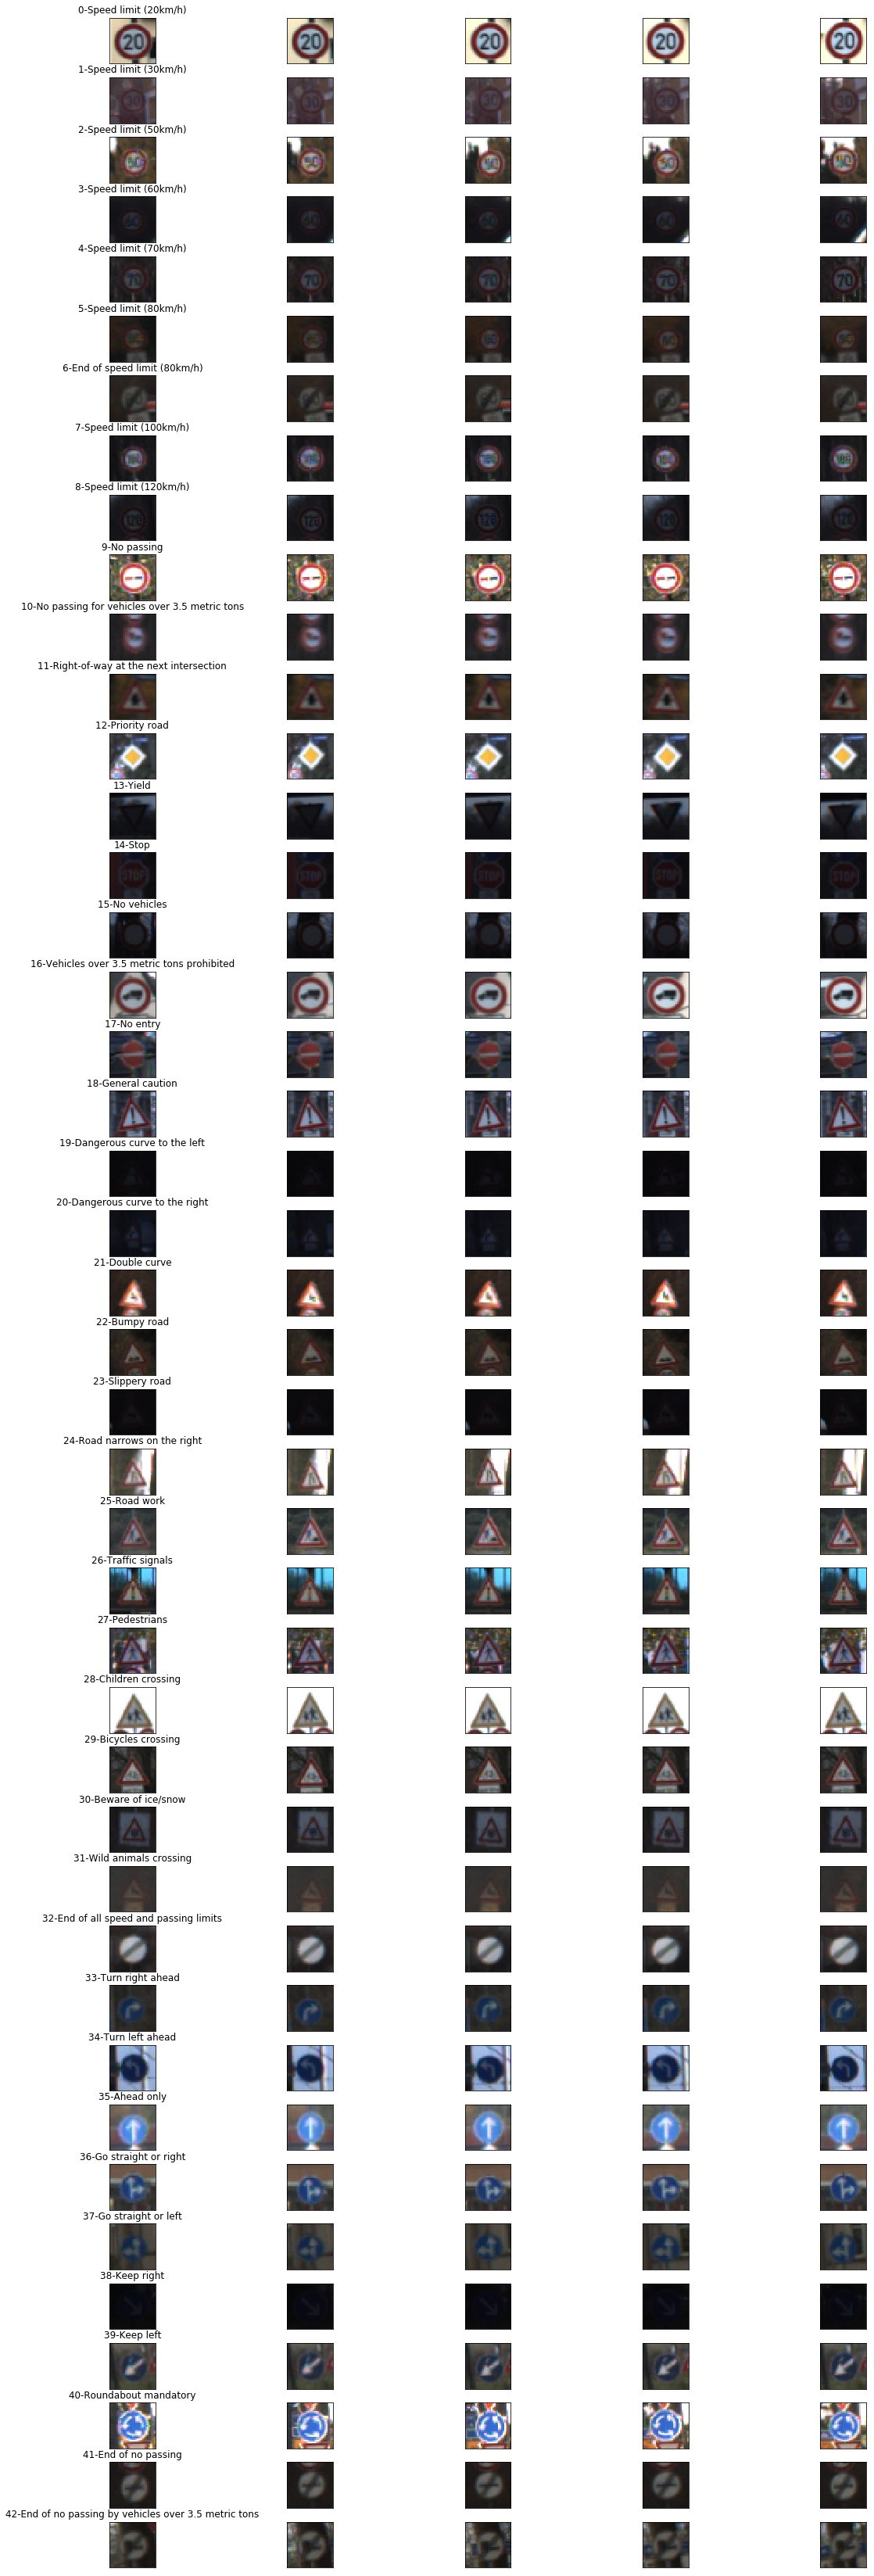

In [3]:

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(n_classes, 5, figsize=(20, 60), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i in class_ids:
    image_idx = np.where(y_train == i)[0]
    for j in range(5):
        axes[i, j].imshow(X_train[image_idx][j])
    axes[i, 0].set_title(str(i) + "-" + sign_names[i])

plt.show()


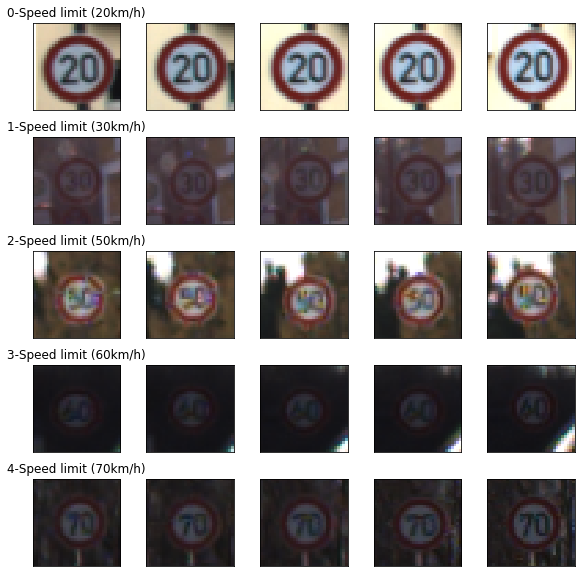

In [4]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i in class_ids[:5]:
    image_idx = np.where(y_train == i)[0]
    for j in range(5):
        axes[i, j].imshow(X_train[image_idx][j])
    axes[i, 0].set_title(str(i) + "-" + sign_names[i])

fig.savefig("visualize.jpeg")

----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
def normalize(images):
    return (images + (-128)) / 128

import cv2

# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv
def increase_brightness(img, value=40):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


# https://medium.com/@REInvestor/converting-color-images-to-grayscale-ab0120ea2c1e
def grayscale(image):
    i = np.copy(image)
    i[:] = np.max(i,axis=-1,keepdims=1)/2+np.min(i,axis=-1,keepdims=1)/2
    return i

def preprocess(image):
    improved_brightness = increase_brightness(image)
    gray = grayscale(improved_brightness)
#     merge = cv2.merge(cv2.split(improved_brightness) + cv2.split(greyscale))
    normalized_merged = normalize(gray)
    return normalized_merged



In [ ]:
fig, axes = plt.subplots(n_classes, 5, figsize=(20, 60), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)


for i in signs["ClassId"].index:

    image_idx = np.where(y_train == i)[0][1]
    axes[i,0].set_title(str(i) + "-" + sign_names[i])
    
    axes[i,0].imshow(X_train[image_idx])
    axes[0,0].set_title("Unprocessed")
    
    axes[i,1].imshow(increase_brightness(X_train[image_idx]))
    axes[0,1].set_title("increase_brightness")
    
    axes[i,2].imshow(grayscale(X_train[image_idx]))
    axes[0,2].set_title("Grayscale")
 
    axes[i,3].imshow(grayscale(increase_brightness(X_train[image_idx])))
    axes[0,3].set_title("Greyscale + bright")
    
    axes[i,4].imshow(preprocess(X_train[image_idx]))
    axes[0,4].set_title("Preprocessed")

plt.show()

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)


for i in class_ids[:5]:

    image_idx = np.where(y_train == i)[0][1]
    axes[i,0].set_title(str(i) + "-" + sign_names[i])
    
    axes[i,0].imshow(X_train[image_idx])
    axes[0,0].set_title("Unprocessed")
    
    axes[i,1].imshow(increase_brightness(X_train[image_idx]))
    axes[0,1].set_title("increase_brightness")
    
    axes[i,2].imshow(grayscale(X_train[image_idx]))
    axes[0,2].set_title("Grayscale")
 
    axes[i,3].imshow(grayscale(increase_brightness(X_train[image_idx])))
    axes[0,3].set_title("Greyscale + bright")
    
    axes[i,4].imshow(preprocess(X_train[image_idx]))
    axes[0,4].set_title("Preprocessed")

fig.savefig('preprocessed.jpeg')

In [ ]:
X_train_n = [preprocess(i) for i in X_train]
X_valid_n = [preprocess(i) for i in X_valid]
X_test_n =  [preprocess(i) for i in X_test]

### Model Architecture

In [ ]:
### Define your architecture here.
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
   #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x50.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 50), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(50))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, 0.95)

    #Pooling. Input = 28x28x50. Output = 14x14x50.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x100.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 50, 100), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(100))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, 0.85)

    #Pooling. Input = 10x10x100. Output = 5x5x100.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x100. Output = 2500.
    fc0 = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 2500. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2500, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    fc1 = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    fc2 = tf.nn.relu(fc2)

    #Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

BATCH_SIZE = 128
EPOCHS = 20

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
from sklearn.utils import shuffle


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...",num_examples)
    print()
    for i in range(EPOCHS):
        X_train_n, y_train = shuffle(X_train_n, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_n[offset:end], y_train[offset:end]
            a = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_accuracy = evaluate(X_train_n, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        validation_accuracy = evaluate(X_valid_n, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

In [ ]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_n, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
%matplotlib inline

def read_image(f):
    img = mpimg.imread(f)
    resized_img = cv2.resize(img, (32,32))
    return resized_img

images = ['test/children-crossing.jpeg', 'test/stop.jpeg', 'test/30kph.jpeg', 'test/keep-right.jpeg', 'test/yield.jpeg']
image_labels = [28, 14, 1, 38, 13]

test_images = [read_image(i) for i in images]
processed_images = [preprocess(img) for img in test_images]


fig, axes = plt.subplots( len(images), 2, figsize=(20, 13), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, name in enumerate(images):
    axes[i,0].imshow(test_images[i])
    axes[i,1].imshow(processed_images[i])
    axes[i,0].set_title("%s (File : %s) " % (sign_names[image_labels[i]], name))

plt.show()

fig, axes = plt.subplots( len(images), 1, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i, name in enumerate(images):
    axes[i].imshow(mpimg.imread(images[i]))
    axes[i].set_title("%s (File : %s) " % (sign_names[image_labels[i]], name))

fig.savefig('test-images.jpeg')


### Load and Output the Images

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

fig, axes = plt.subplots( len(processed_images), 1, figsize=(20, 13), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = np.argmax(np.array(sess.run(logits, feed_dict={x: processed_images})),axis = 1)
#     print(image_labels)
#     print(results)
#     print([signs['SignName'][i] for i in results])
    
    for i,image in enumerate(processed_images):
        axes[i].imshow(image)
        actual = image_labels[i]
        pred = results[i]
        axes[i].set_title("Actual: %d (%s), Predicted: %d (%s)" % (actual, sign_names[actual], pred, sign_names[pred]))
    plt.show()


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


for i, result in enumerate(results):
    print("Image %d : %s" % (i, images[i]))
    print('Actual = %d (%s)' % (image_labels[i], signs['SignName'][image_labels[i]]))
    print('Predicted = %d (%s)' % (results[i], signs['SignName'][results[i]]))
    print()

print()
print("="*40)
print('Accuracy: %9.2f' % (np.sum(image_labels==results)/len(image_labels)))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = sess.run(tf.nn.softmax(logits), feed_dict = {x:processed_images})
    top5 = sess.run(tf.nn.top_k(softmax, k=5))


    for i in range(len(processed_images)):
        print("Image %d : %s" % (i, images[i]))
        print("Actual :", sign_names[image_labels[i]])
        print("Predicted ", sign_names[results[i]])
        print("Top 5 softmax probablililies")
        
        for j in range(5):
            print("%9.4f %2d %s "%  (top5.values[i][j], top5.indices[i][j], signs['SignName'][top5.indices[i][j]]))
        print()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")